# Statistics -- İstatistik

Veri biliminde sağlam bir istatistik anlayışına sahip olmak, verilerimizi daha iyi anlamamıza ve gelecekteki sonuçların ölçülebilir bir değerlendirmesini oluşturmamıza olanak tanır.

------------------------------------

Having a solid understanding of statistics in data science allows us to understand our data better, and allows us to create a quantifiable evaluation of any future conclusions.

In [ ]:
using Statistics
using StatsBase
using RDatasets
using Plots
using StatsPlots
using KernelDensity
using Distributions
using LinearAlgebra
using HypothesisTests
using PyCall
using MLBase

In [ ]:
D = dataset("datasets","faithful")
@show names(D)
D

In [ ]:
describe(D)

In [ ]:
eruptions = D[!,:Eruptions]
scatter(eruptions,label="eruptions")
waittime = D[!,:Waiting]
scatter!(waittime,label="wait time")

In [ ]:
boxplot(["eruption length"],eruptions,legend=false,size=(200,400),whisker_width=1,ylabel="time in minutes")

In [ ]:
histogram(eruptions,label="eruptions")

In [ ]:
#?histogram

In [ ]:
histogram(eruptions,bins=:sqrt,label="eruptions")

In [ ]:
p=kde(eruptions)

In [ ]:
histogram(eruptions,label="eruptions")
plot!(p.x,p.density .* length(eruptions), linewidth=3,color=2,label="kde fit") # nb of elements*bin width

In [ ]:
histogram(eruptions,bins=:sqrt,label="eruptions")
plot!(p.x,p.density .* length(eruptions) .*0.2, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

In [ ]:
myrandomvector = randn(100_000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

In [ ]:
d = Normal()
myrandomvector = rand(d,100000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

In [ ]:
b = Binomial(40) 
myrandomvector = rand(b,1000000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.5,color=2,label="kde fit") # nb of elements*bin width

In [ ]:
x = rand(1000)
d = fit(Normal, x)
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3,label="fit")
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3,label="myvector")

In [ ]:
x = eruptions
d = fit(Normal, x)
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3)
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3)

In [ ]:
#?OneSampleTTest

In [ ]:
myrandomvector = randn(1000)
OneSampleTTest(myrandomvector)

In [ ]:
OneSampleTTest(eruptions)

In [ ]:
scipy_stats = pyimport("scipy.stats")
@show scipy_stats.spearmanr(eruptions,waittime)
@show scipy_stats.pearsonr(eruptions,waittime)

In [ ]:
scipy_stats.pearsonr(eruptions,waittime)

In [ ]:
corspearman(eruptions,waittime)

In [ ]:
cor(eruptions,waittime)

In [ ]:
scatter(eruptions,waittime,xlabel="eruption length",
    ylabel="wait time between eruptions",legend=false,grid=false,size=(400,300))

In [ ]:
gt = [1, 1, 1, 1, 1, 1, 1, 2]
pred = [1, 1, 2, 2, 1, 1, 1, 1]
C = confusmat(2, gt, pred)   # compute confusion matrix
C ./ sum(C, dims=2)   # normalize per class
sum(diag(C)) / length(gt)  # compute correct rate from confusion matrix
correctrate(gt, pred)
C = confusmat(2, gt, pred)

In [ ]:
gt = [1, 1, 1, 1, 1, 1, 1, 0];
pred = [1, 1, 0, 0, 1, 1, 1, 1]
ROC = MLBase.roc(gt,pred)
recall(ROC)
precision(ROC)

# Dimensionality Reduction

Adından da anlaşılacağı gibi, boyut azaltma, özellik setinizi çok daha küçük bir sayıya indirme fikridir. Boyut azaltma, benzer örnekleri denemek ve tespit etmek için veri kümelerinin görselleştirilmesinde sıklıkla kullanılır. Burada üç boyutluluk azaltma tekniklerini ele alacağız:

-----------------------------------------------

As the name says, dimensionality reduction is the idea of reducing your feature set to a much smaller number. Dimensionality reduction is often used in visualization of datasets to try and detect samples that are similar. We will cover three dimensionality reduction techniques here:


t-SNE / 
PCA / 
umap / 

In [18]:
using UMAP
using Makie
using XLSX
using VegaDatasets
using DataFrames
using MultivariateStats
using RDatasets
using StatsBase
using Statistics
using LinearAlgebra
using Plots
using ScikitLearn
using MLBase
using Distances

In [19]:
C = DataFrame(VegaDatasets.dataset("cars"))

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower
,String,Float64?,Int64,Float64,Int64?
1,chevrolet chevelle malibu,18.0,8,307.0,130
2,buick skylark 320,15.0,8,350.0,165
3,plymouth satellite,18.0,8,318.0,150
4,amc rebel sst,16.0,8,304.0,150
5,ford torino,17.0,8,302.0,140
6,ford galaxie 500,15.0,8,429.0,198
7,chevrolet impala,14.0,8,454.0,220
8,plymouth fury iii,14.0,8,440.0,215
9,pontiac catalina,14.0,8,455.0,225


In [20]:
dropmissing!(C)
M = Matrix(C[:,2:7])
names(C)

9-element Vector{String}:
 "Name"
 "Miles_per_Gallon"
 "Cylinders"
 "Displacement"
 "Horsepower"
 "Weight_in_lbs"
 "Acceleration"
 "Year"
 "Origin"

In [21]:
car_origin = C[:,:Origin]
carmap = labelmap(car_origin) #from MLBase
uniqueids = labelencode(carmap,car_origin)

392-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 2
 1
 1
 1
 3
 1
 1
 1

# PCA

### We will first center the data.

In [22]:
# center and normalize the data
data = M
data = (data .- mean(data,dims = 1))./ std(data,dims=1)

392×6 Matrix{Float64}:
 -0.697747   1.48205    1.07591    0.663285   0.619748   -1.28362
 -1.08212    1.48205    1.48683    1.57258    0.842258   -1.46485
 -0.697747   1.48205    1.18103    1.18288    0.539692   -1.64609
 -0.953992   1.48205    1.04725    1.18288    0.53616    -1.28362
 -0.82587    1.48205    1.02813    0.923085   0.554997   -1.82732
 -1.08212    1.48205    2.24177    2.42992    1.60515    -2.00855
 -1.21024    1.48205    2.48068    3.00148    1.62045    -2.37102
 -1.21024    1.48205    2.34689    2.87158    1.57101    -2.55226
 -1.21024    1.48205    2.49023    3.13138    1.70404    -2.00855
 -1.08212    1.48205    1.86908    2.22208    1.02709    -2.55226
 -1.08212    1.48205    1.80219    1.70248    0.689209   -2.00855
 -1.21024    1.48205    1.39127    1.44268    0.743365   -2.73349
 -1.08212    1.48205    1.96464    1.18288    0.922314   -2.18979
  ⋮                                                       ⋮
  0.199113   0.309571  -0.128168   0.143685  -0.0383613   0

In [23]:
# each car is now a column, PCA takes features - by - samples matrix
data'

6×392 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.697747  -1.08212   -0.697747  …   1.09597    0.583482   0.967851
  1.48205    1.48205    1.48205      -0.862911  -0.862911  -0.862911
  1.07591    1.48683    1.18103      -0.567753  -0.711097  -0.720653
  0.663285   1.57258    1.18288      -0.531795  -0.661694  -0.583754
  0.619748   0.842258   0.539692     -0.803605  -0.415097  -0.303253
 -1.28362   -1.46485   -1.64609   …  -1.4286     1.10867    1.39865

In [24]:
p = fit(PCA,data',maxoutdim=2)

PCA(indim = 6, outdim = 2, principalratio = 0.9194828785333573)

In [25]:
P = projection(p)

6×2 Matrix{Float64}:
  0.398973  -0.244835
 -0.430615   0.148314
 -0.443531   0.108497
 -0.434122  -0.166158
 -0.430103   0.286095
  0.291926   0.892652

In [26]:
P'*(data[1,:]-mean(p))

2-element Vector{Float64}:
 -2.3230016965226925
 -0.5713519642644683

In [27]:
Yte = MultivariateStats.transform(p, data') #notice that Yte[:,1] is the same as P'*(data[1,:]-mean(p))

2×392 Matrix{Float64}:
 -2.323     -3.20196  -2.66658   -2.60214   …   1.22011  1.70921   1.86951
 -0.571352  -0.68187  -0.992744  -0.621975     -1.87471  0.632857  0.815607

In [28]:
# reconstruct testing observations (approximately)
Xr = reconstruct(p, Yte)

6×392 Matrix{Float64}:
 -0.786928  -1.11055  -0.820834  …   0.945785   0.526984   0.546196
  0.91558    1.27768   1.00103      -0.803445  -0.64215   -0.684075
  0.968334   1.34619   1.075        -0.744559  -0.689425  -0.740696
  1.1034     1.50334   1.32257      -0.218179  -0.847159  -0.947116
  0.835669   1.18209   0.862883     -1.06112   -0.554079  -0.570742
 -1.18816   -1.54341  -1.66462   …  -1.31728    1.06388    1.27381

In [29]:
norm(Xr-data') # this won't be zero

13.74384105556901

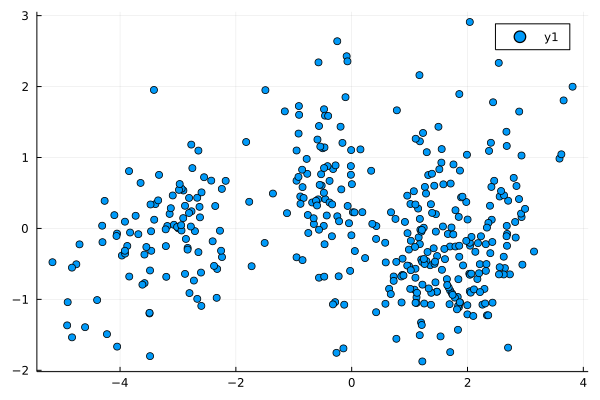

In [30]:
Plots.scatter(Yte[1,:],Yte[2,:])

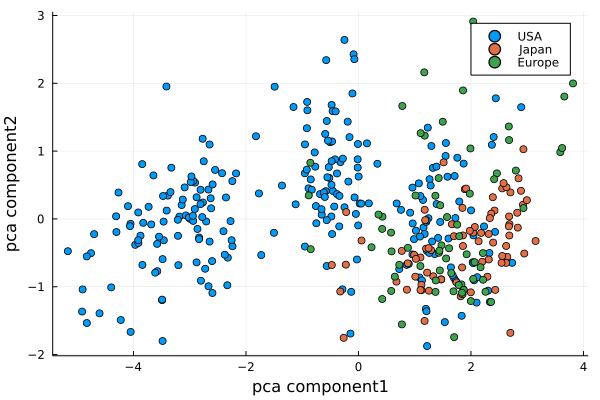

In [31]:
Plots.scatter(Yte[1,car_origin.=="USA"],Yte[2,car_origin.=="USA"],color=1,label="USA")
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")
Plots.scatter!(Yte[1,car_origin.=="Japan"],Yte[2,car_origin.=="Japan"],color=2,label="Japan")
Plots.scatter!(Yte[1,car_origin.=="Europe"],Yte[2,car_origin.=="Europe"],color=3,label="Europe")

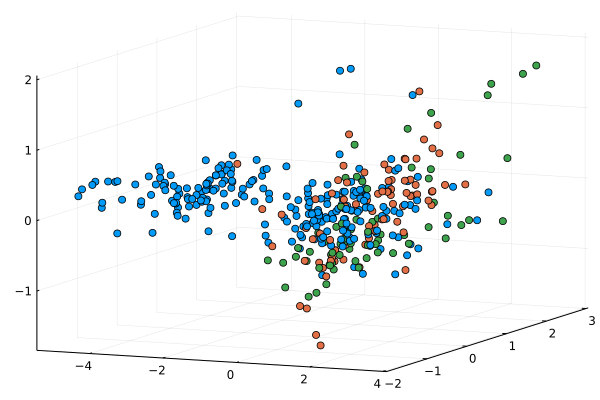

In [32]:
p = fit(PCA,data',maxoutdim=3)
Yte = MultivariateStats.transform(p, data')
scatter3d(Yte[1,:],Yte[2,:],Yte[3,:],color=uniqueids,legend=false)

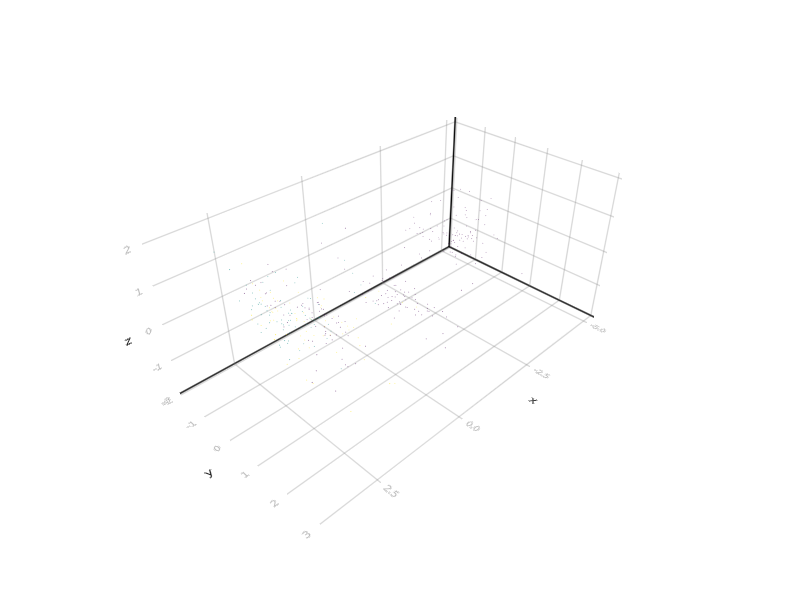

In [33]:
using GLMakie
scene = Makie.scatter(Yte[1,:],Yte[2,:],Yte[3,:],color=uniqueids)

In [40]:
display(scene)

GLMakie.Screen(...)

### t-SNE

Boyut azaltma için kullanacağımız bir sonraki yöntem t-SNE'dir. Julia'dan t-SNE'yi aramanın birden çok yolu vardır. Bu not defterine göz atın: https://github.com/nassarhuda/JuliaTutorials/blob/master/TSNE/TSNE.ipynb. Ama bu fırsatı yeni bir şey denemek için kullanacağız... Scikit öğrenme python paketinden bir işlev çağırın. Bu, ScikitLearn paketini kullanır.

-----------------------------------

The next method we will use for dimensionality reduction is t-SNE. There are multiple ways you can call t-SNE from julia. Check out this notebook: https://github.com/nassarhuda/JuliaTutorials/blob/master/TSNE/TSNE.ipynb. But we will take this opportunity to try out something new... Call a function from the Scikit learn python package. This makes use of the package ScikitLearn.

┌ Info: Installing sklearn via the Conda scikit-learn package...
└ @ PyCall C:\Users\suley\.julia\packages\PyCall\BD546\src\PyCall.jl:711
┌ Info: Running `conda install -y scikit-learn` in root environment
└ @ Conda C:\Users\suley\.julia\packages\Conda\sNGum\src\Conda.jl:128


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\suley\.julia\conda\3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    icc_rt-2019.0.0            |       h0cc432a_1         6.0 MB
    joblib-1.0.1               |     pyhd3eb1b0_0         208 KB
    scikit-learn-0.24.2        |   py39hf11a4ad_1         4.9 MB
    scipy-1.7.1                |   py39hbe87c03_2        13.8 MB
    threadpoolctl-2.2.0        |     pyh0d69192_0          16 KB
    ------------------------------------------------------------
                                           Total:        24.9 MB

The following NEW packages will be INSTALLED:

  icc_rt             pkgs/main/win-64::icc_rt-2019.0.0-h0cc432a_1
  joblib             pkgs/main/noarch::joblib-1.0.1-pyhd3eb1b0_0
  scikit-learn       pkgs/main/win-64::scikit-learn-0.24.2-p

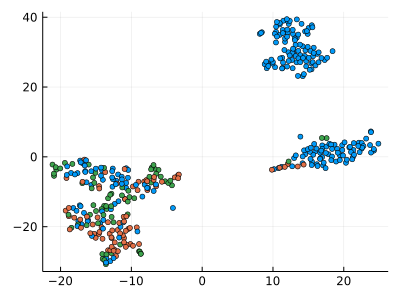

In [35]:
@sk_import manifold : TSNE
tfn = TSNE(n_components=2) #,perplexity=20.0,early_exaggeration=50)
Y2 = tfn.fit_transform(data);
Plots.scatter(Y2[:,1],Y2[:,2],color=uniqueids,legend=false,size=(400,300),markersize=3)

### Next, UMAP

Bu bizim son boyut indirgeme yöntemimiz olacak ve bunun için UMAP paketini kullanacağız.

--------

This will be our final dimensionality reduction method and we will use the package UMAP for it.

In [36]:
L = cor(data,data,dims=2)
embedding = umap(L, 2)

2×392 Matrix{Float64}:
 -6.07592  -6.58224  -5.97971  …  8.5169    3.75138  8.01919  8.16509
 -5.18872  -5.37355  -5.83015     2.40813  -3.68207  3.22899  2.97045

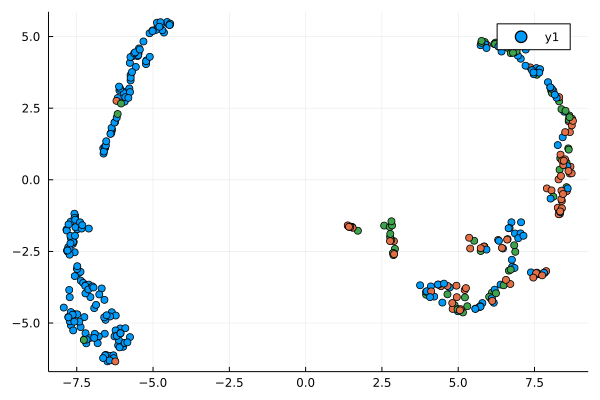

In [37]:
Plots.scatter(embedding[1,:],embedding[2,:],color=uniqueids)

UMAP için, istersek, her gözlem çifti arasında farklı mesafeler oluşturabiliriz. Ancak her iki seçenekte bile, UMAP'ın t-SNE ve PCA ile gözlemlediğimize çok benzer bir model oluşturduğunu göreceğiz.

-------

For UMAP, we can create distances between every pair of observations differently, if we choose to. But even with both choices, we will see that UMAP generates a very similar pattern to what we have observed with t-SNE and PCA.

In [38]:
L = pairwise(Euclidean(), data, data,dims=1) 
embedding = umap(-L, 2)

2×392 Matrix{Float64}:
  6.18695  7.57885   6.75411   6.71306  …  -6.83137  -4.05799  -3.79624
 -2.26337  1.14322  -1.87329  -1.91833      3.63969   2.47122   2.6045

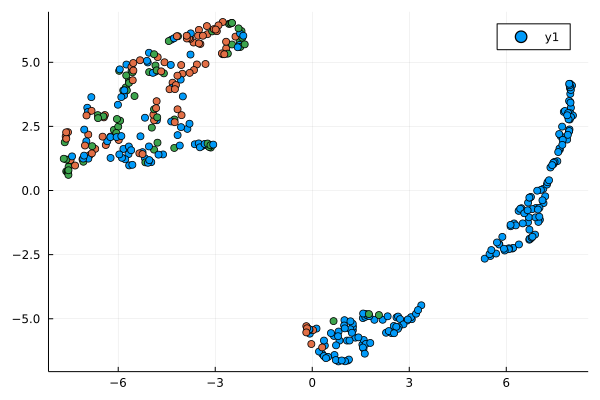

In [39]:
Plots.scatter(embedding[1,:],embedding[2,:],color=uniqueids)

# Finally...
Bu defteri bitirdikten sonra şunları yapabilmelisiniz:

* verilerinize tsne uygulayın
* verilerinize umap uygulayın
* verilerinize pca uygulayın
* bir 3d çizim oluştur
* Python'un ScikitLearn'inden bir işlev çağırın

Harika bir keşif
Kullandığımız tüm boyutsallık azaltma teknikleri, Amerikan arabalarının kendi özelliklerine göre kendi iki grubunu oluşturduğu gibi, Avrupa ve Japon arabalarının spesifikasyonlarda benzer göründüğü konusunda hemfikir görünüyordu.

Mavi Amerikan arabalarıdır. Yeşil ve turuncu Japon ve Avrupa'dır.

--------------

After finishing this notebook, you should be able to:

* apply tsne on your data
* apply umap on your data
* apply pca on your data
* generate a 3d plot
* call a function from Python's ScikitLearn

One cool finding
All dimensionality reduction techniques we used seemed to agree on that European and Japanese cars seem to be similar in specifications where as American cars seem to form their own two clusters based on their specifications.

Blue are American cars. Green and orange are Japanese and European.